In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("churn_dataset.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.query("TotalCharges==' ' ").index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [5]:
df.drop(index=[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754],inplace=True)

In [6]:
df["TotalCharges"]=df["TotalCharges"].astype('float')

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
num=['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
cat=[ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']

Column:- SeniorCitizen
Mean:- 0.16240045506257111
Median:- 0.0
Std:- 0.3688439967571208
min:- 0
max:- 1


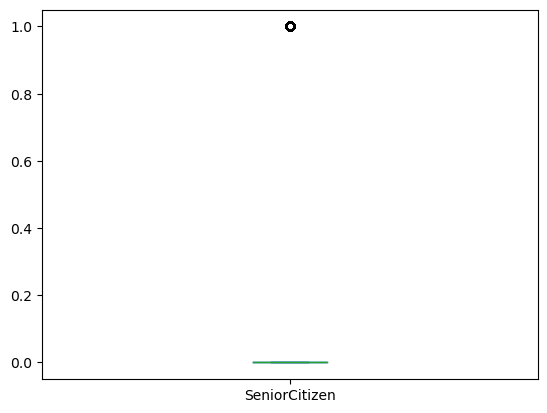

AxesSubplot(0.125,0.11;0.775x0.77) None


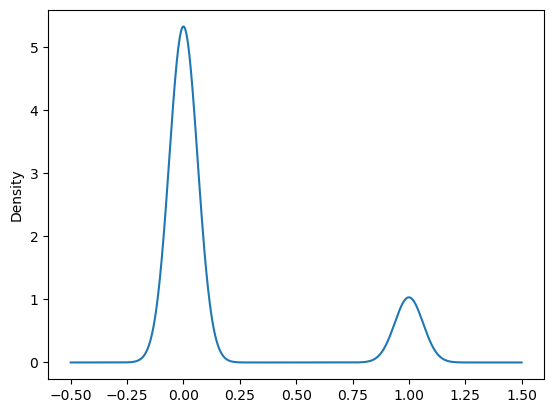

AxesSubplot(0.125,0.11;0.775x0.77) None

*************************************************************
Column:- tenure
Mean:- 32.421786120591584
Median:- 29.0
Std:- 24.545259709263192
min:- 1
max:- 72


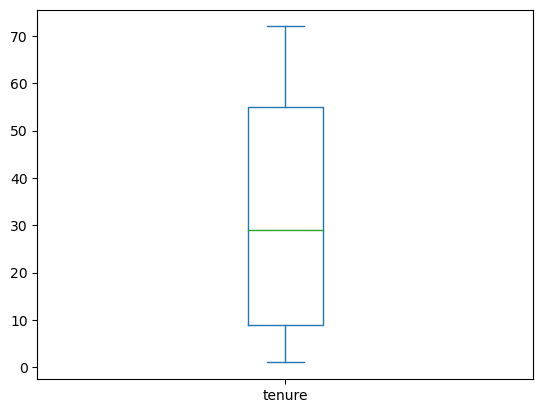

AxesSubplot(0.125,0.11;0.775x0.77) None


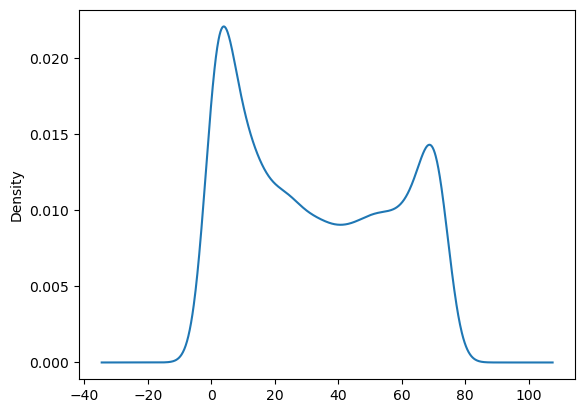

AxesSubplot(0.125,0.11;0.775x0.77) None

*************************************************************
Column:- MonthlyCharges
Mean:- 64.79820819112632
Median:- 70.35
Std:- 30.08597388404983
min:- 18.25
max:- 118.75


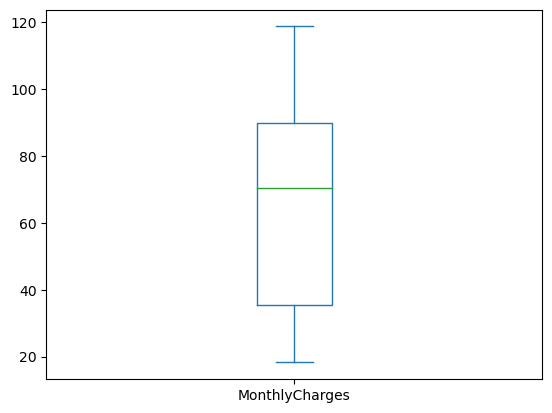

AxesSubplot(0.125,0.11;0.775x0.77) None


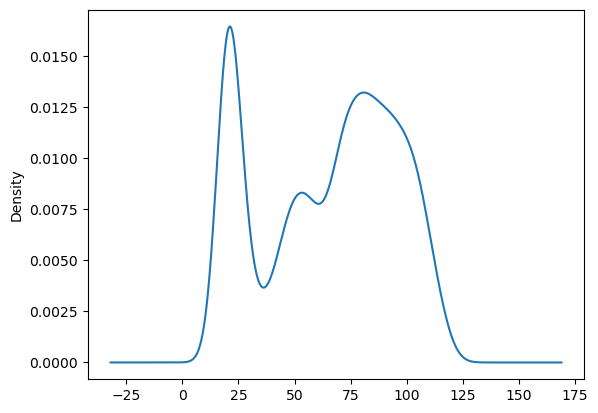

AxesSubplot(0.125,0.11;0.775x0.77) None

*************************************************************
Column:- TotalCharges
Mean:- 2283.3004408418697
Median:- 1397.475
Std:- 2266.7713618831453
min:- 18.8
max:- 8684.8


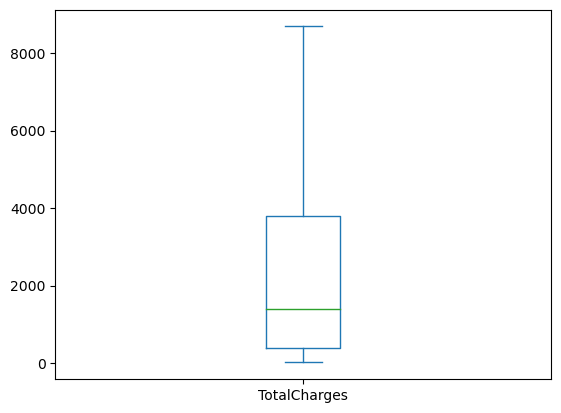

AxesSubplot(0.125,0.11;0.775x0.77) None


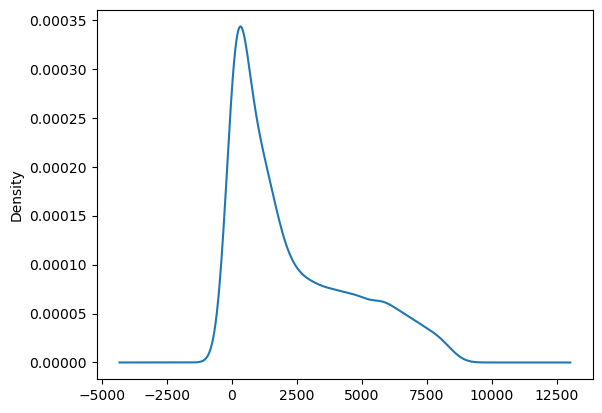

AxesSubplot(0.125,0.11;0.775x0.77) None

*************************************************************


In [11]:
for i in num:
    print("Column:-",i)
    print('Mean:-',df[i].mean())
    print('Median:-',df[i].median())
    print("Std:-",df[i].std())
    print("min:-",df[i].min())
    print("max:-",df[i].max())
    print(df[i].plot(kind="box"),plt.show())
    print(df[i].plot(kind="kde"),plt.show())
    print()
    print("*************************************************************")

Feature = gender

mode: 0    Male
Name: gender, dtype: object
Value_counts:
 Male      3549
Female    3483
Name: gender, dtype: int64


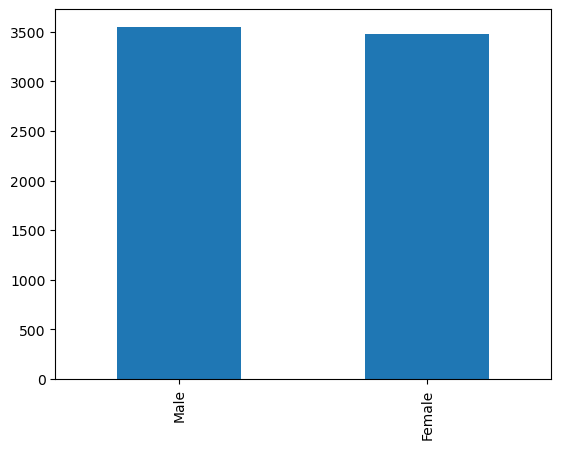

AxesSubplot(0.125,0.11;0.775x0.77) None
******************************************************************
Feature = Partner

mode: 0    No
Name: Partner, dtype: object
Value_counts:
 No     3639
Yes    3393
Name: Partner, dtype: int64


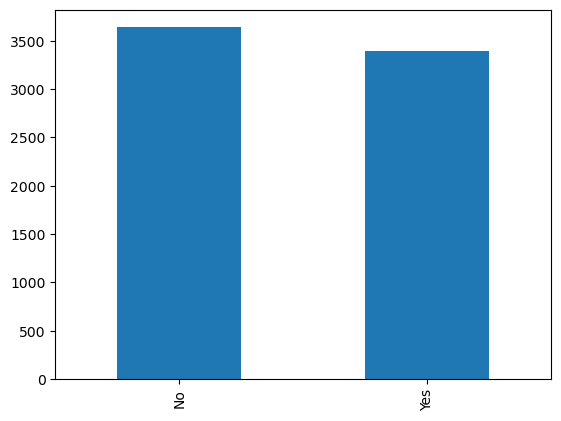

AxesSubplot(0.125,0.11;0.775x0.77) None
******************************************************************
Feature = Dependents

mode: 0    No
Name: Dependents, dtype: object
Value_counts:
 No     4933
Yes    2099
Name: Dependents, dtype: int64


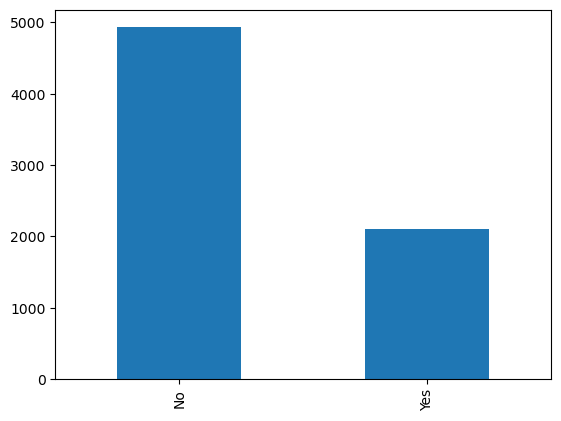

AxesSubplot(0.125,0.11;0.775x0.77) None
******************************************************************
Feature = PhoneService

mode: 0    Yes
Name: PhoneService, dtype: object
Value_counts:
 Yes    6352
No      680
Name: PhoneService, dtype: int64


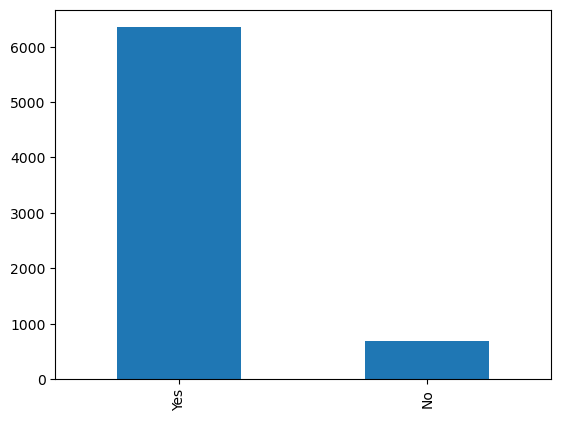

AxesSubplot(0.125,0.11;0.775x0.77) None
******************************************************************
Feature = MultipleLines

mode: 0    No
Name: MultipleLines, dtype: object
Value_counts:
 No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64


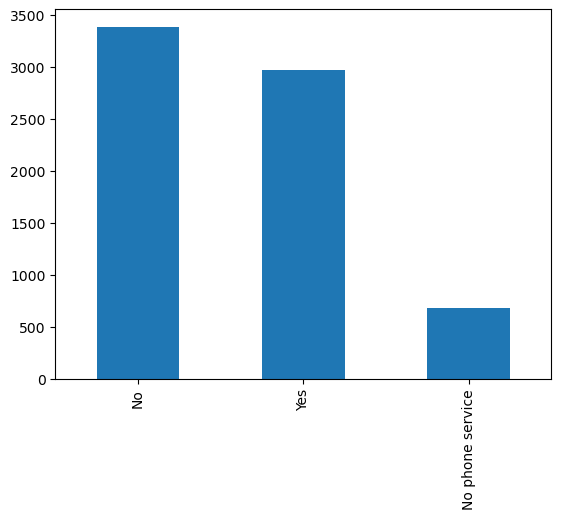

AxesSubplot(0.125,0.11;0.775x0.77) None
******************************************************************
Feature = InternetService

mode: 0    Fiber optic
Name: InternetService, dtype: object
Value_counts:
 Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64


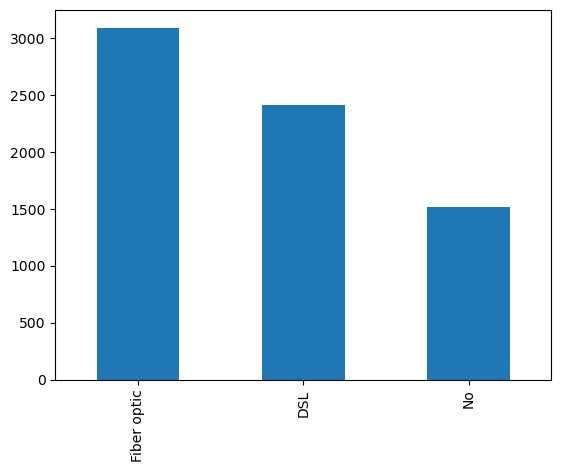

AxesSubplot(0.125,0.11;0.775x0.77) None
******************************************************************
Feature = OnlineSecurity

mode: 0    No
Name: OnlineSecurity, dtype: object
Value_counts:
 No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64


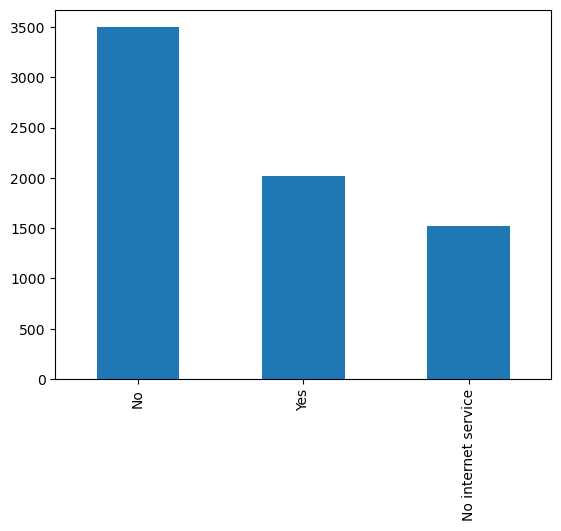

AxesSubplot(0.125,0.11;0.775x0.77) None
******************************************************************
Feature = OnlineBackup

mode: 0    No
Name: OnlineBackup, dtype: object
Value_counts:
 No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64


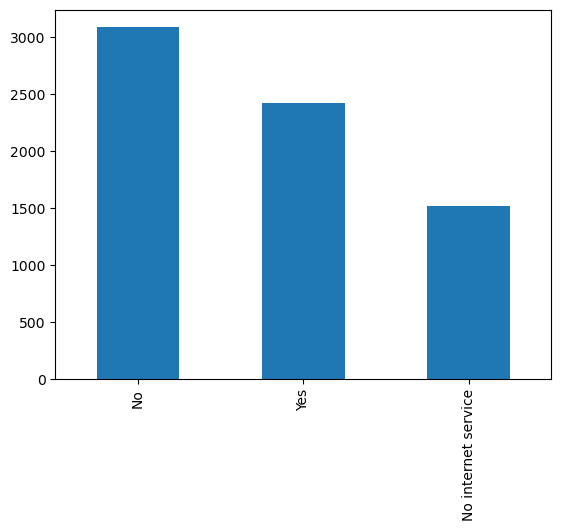

AxesSubplot(0.125,0.11;0.775x0.77) None
******************************************************************
Feature = DeviceProtection

mode: 0    No
Name: DeviceProtection, dtype: object
Value_counts:
 No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64


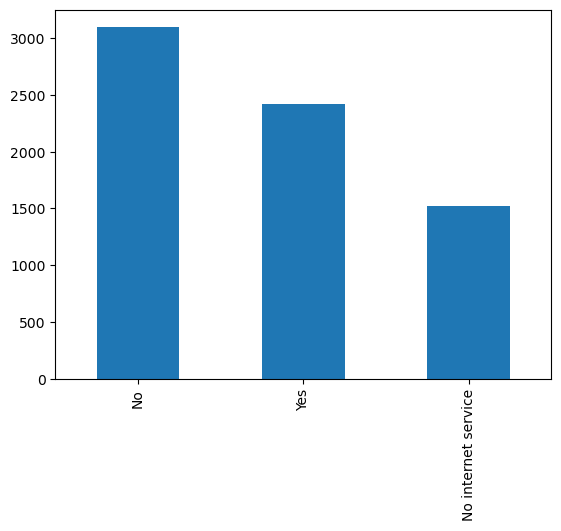

AxesSubplot(0.125,0.11;0.775x0.77) None
******************************************************************
Feature = TechSupport

mode: 0    No
Name: TechSupport, dtype: object
Value_counts:
 No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64


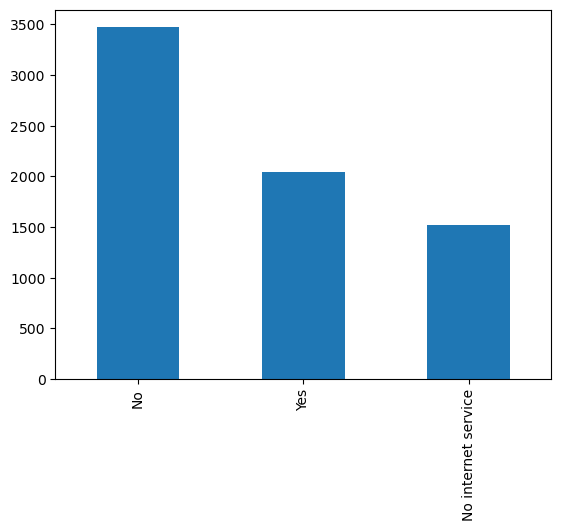

AxesSubplot(0.125,0.11;0.775x0.77) None
******************************************************************
Feature = StreamingTV

mode: 0    No
Name: StreamingTV, dtype: object
Value_counts:
 No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64


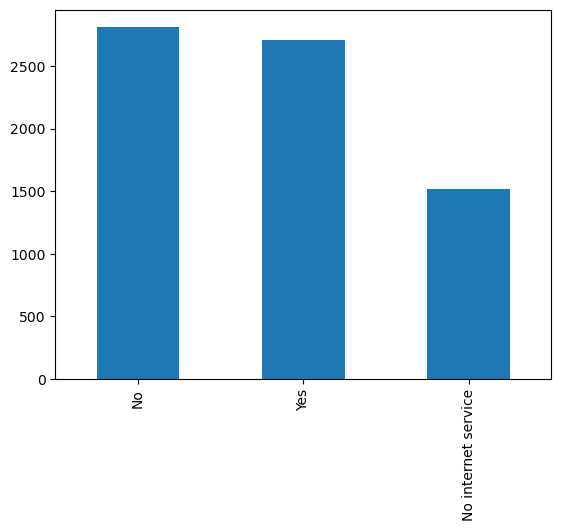

AxesSubplot(0.125,0.11;0.775x0.77) None
******************************************************************
Feature = StreamingMovies

mode: 0    No
Name: StreamingMovies, dtype: object
Value_counts:
 No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64


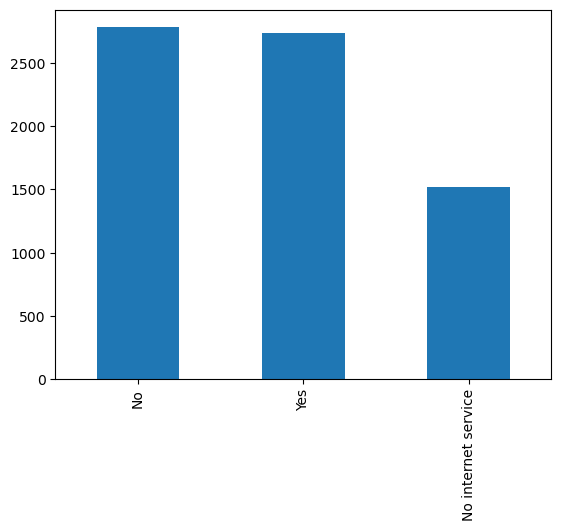

AxesSubplot(0.125,0.11;0.775x0.77) None
******************************************************************
Feature = Contract

mode: 0    Month-to-month
Name: Contract, dtype: object
Value_counts:
 Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64


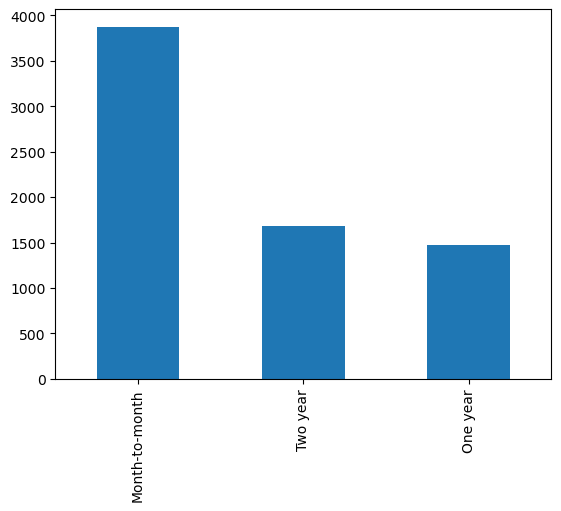

AxesSubplot(0.125,0.11;0.775x0.77) None
******************************************************************
Feature = PaperlessBilling

mode: 0    Yes
Name: PaperlessBilling, dtype: object
Value_counts:
 Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64


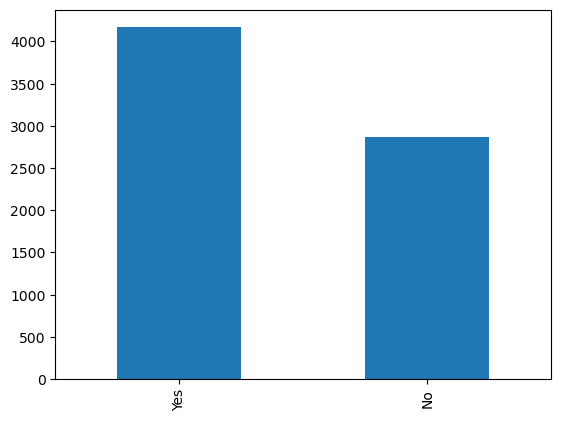

AxesSubplot(0.125,0.11;0.775x0.77) None
******************************************************************
Feature = PaymentMethod

mode: 0    Electronic check
Name: PaymentMethod, dtype: object
Value_counts:
 Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64


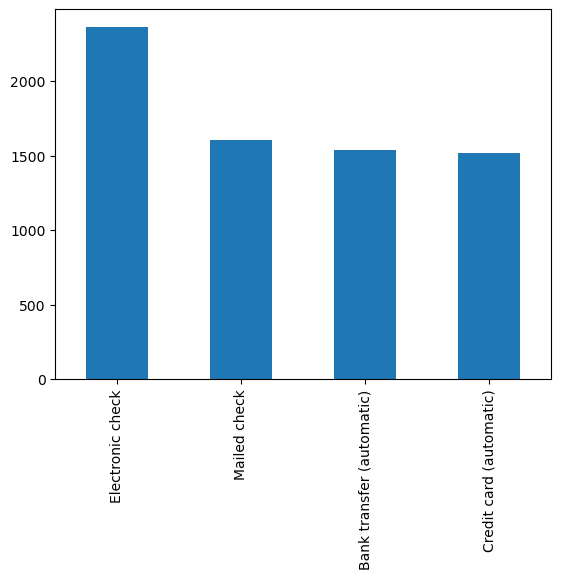

AxesSubplot(0.125,0.11;0.775x0.77) None
******************************************************************
Feature = Churn

mode: 0    No
Name: Churn, dtype: object
Value_counts:
 No     5163
Yes    1869
Name: Churn, dtype: int64


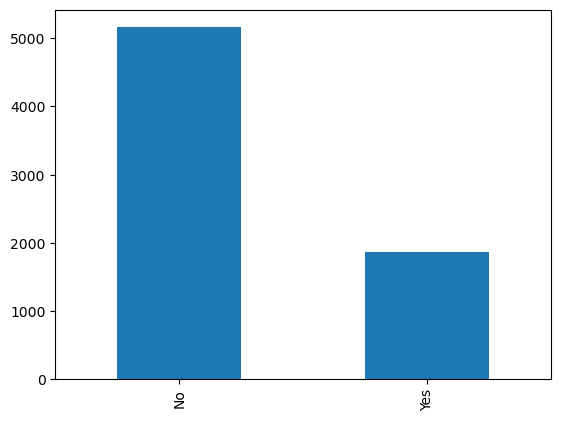

AxesSubplot(0.125,0.11;0.775x0.77) None
******************************************************************


In [12]:
for column in cat:
    print("Feature =",column)
    print()
    print("mode:",df[column].mode())
    print("Value_counts:\n",df[column].value_counts())
    print(df[column].value_counts().plot(kind = 'bar'),plt.show())
    print("******************************************************************")

SPRINT 2 - Data Preparation and Model Building

Problem Statement - Given various features about a customer like Gender, SeniorCitizen, Partner, Dependents etc.. , predict if the customer will churn or not.

Task - Prepare the Data and build a model to predict the churn of a customer.

Step - 1: Load the data
Step - 2: Document the below mentioned points properly: 
- Identify the input and output/target variables. 
- Identify the type of ML Task.
- Identify the Evaluation Metric.
	- For regression task - Mean Absolute Error
	- For classification task - Accuracy
Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).
Step - 4: Data preparation on train data:
- For Numerical Variables - Standardization or Normalization (Fit and Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)
Step - 5: Data preparation on test data:
- For Numerical Variables - Standardization (Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)
Step - 6: Model Training Phase - Use all the algorithms mentioned below to train separate models:
- KNN
- Logistic Regression
- Support Vector Machines
- Decision Trees
- Random Forest
Step - 7: Predict and evaluate each model separately using the correct evaluation metric. Use metrics.accuracy_score(actual, predict).
Step - 8: Display a plot which shows all the algorithms applied along with the accuracies achieved. Write your conclusion on the best algorithm for Churn Prediction.


In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
#Identifying the output/target variable
y=df['Churn']
X=df[[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

In [15]:
# Target variable is numerical we can conclude that it is an "Classification Task"
# Evaluation metric task = Accuracy

In [16]:
# Spliting into Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.75,random_state=100)

In [17]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5523,Female,0,Yes,No,7,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),69.20,477.55
1676,Female,0,No,No,4,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,80.15,319.85
511,Male,0,No,No,61,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.45,6300.15
1595,Male,1,No,No,2,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,74.70,165.40
3329,Female,0,Yes,No,18,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,50.30,908.75


In [18]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(5274, 19) (5274,)
(1758, 19) (1758,)


##### Seperating Categorical and numerical columns

In [19]:
X_train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [20]:
#Categorical
X_train_cat=X_train.select_dtypes(include=['object'])
X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5523,Female,Yes,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic)
1676,Female,No,No,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
511,Male,No,No,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
1595,Male,No,No,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
3329,Female,Yes,No,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check


In [21]:
#Numerical
X_train_num = X_train.select_dtypes(include=["int64","float64"])
X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5523,0,7,69.20,477.55
1676,0,4,80.15,319.85
511,0,61,106.45,6300.15
1595,1,2,74.70,165.40
3329,0,18,50.30,908.75


In [22]:
# Scaling on Numerical columns
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [23]:
X_train_num_rescaled=pd.DataFrame(scaler.fit_transform(X_train_num),
                                  columns=X_train_num.columns,
                                  index=X_train_num.index)
X_train_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5523,-0.438945,-1.035648,0.151080,-0.795902
1676,-0.438945,-1.157923,0.514997,-0.865409
511,-0.438945,1.165295,1.389062,1.770434
1595,2.278188,-1.239439,0.333869,-0.933484
3329,-0.438945,-0.587308,-0.477051,-0.605849


In [24]:
X_train_num.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5274.000000,5274.000000,5274.000000,5274.000000
mean,0.161547,32.409556,64.654124,2283.323341
std,0.368070,24.537263,30.092133,2269.052626
min,0.000000,1.000000,18.250000,18.850000
25%,0.000000,9.000000,35.500000,395.725000
50%,0.000000,29.000000,70.250000,1394.325000
75%,0.000000,55.000000,89.850000,3778.075000
max,1.000000,72.000000,118.750000,8684.800000


In [25]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 4
Mean of each column: [1.61547213e-01 3.24095563e+01 6.46541240e+01 2.28332334e+03]
Std of each column: [3.68034931e-01 2.45349362e+01 3.00892798e+01 2.26883750e+03]


### One Hot Encoding on categorical columns

In [26]:
for i in cat:
    print("Feature:- ",i)
    print(X_train_cat[i].value_counts(normalize=True))
    print("****************************************************")

Feature:-  gender
Male      0.505878
Female    0.494122
Name: gender, dtype: float64
****************************************************
Feature:-  Partner
No     0.521426
Yes    0.478574
Name: Partner, dtype: float64
****************************************************
Feature:-  Dependents
No     0.703641
Yes    0.296359
Name: Dependents, dtype: float64
****************************************************
Feature:-  PhoneService
Yes    0.904816
No     0.095184
Name: PhoneService, dtype: float64
****************************************************
Feature:-  MultipleLines
No                  0.487865
Yes                 0.416951
No phone service    0.095184
Name: MultipleLines, dtype: float64
****************************************************
Feature:-  InternetService
Fiber optic    0.437239
DSL            0.343572
No             0.219188
Name: InternetService, dtype: float64
****************************************************
Feature:-  OnlineSecurity
No                     0.49

KeyError: 'Churn'

In [27]:
# One hot Encoding
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first',sparse=False)
#To numpy array
X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)
X_train_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5523,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1676,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
511,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1595,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3329,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


##### Concating Encoded Categorical and numerical fetures

In [28]:
X_train_transformed=pd.concat([X_train_num_rescaled,X_train_cat_ohe],axis=1)

X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5523,-0.438945,-1.035648,0.151080,-0.795902,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1676,-0.438945,-1.157923,0.514997,-0.865409,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
511,-0.438945,1.165295,1.389062,1.770434,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1595,2.278188,-1.239439,0.333869,-0.933484,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3329,-0.438945,-0.587308,-0.477051,-0.605849,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## Preparing Test Data

In [29]:
#Categorical Test
X_test_cat= X_test.select_dtypes(include=['object'])
X_test_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
942,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic)
3730,Female,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic)
1761,Male,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic)
2283,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check
1872,Female,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [30]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_test_cat_ohe = pd.DataFrame(encoder.fit_transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
942,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3730,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1761,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2283,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1872,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [31]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
942,0,24,79.85,2001.00
3730,0,57,104.50,5921.35
1761,0,58,24.45,1513.60
2283,0,1,71.55,71.55
1872,0,41,19.70,804.25


In [32]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
942,-0.438945,-0.342758,0.505026,-0.124435
3730,-0.438945,1.002262,1.324255,1.603476
1761,-0.438945,1.043021,-1.336161,-0.339259
2283,-0.438945,-1.280197,0.229180,-0.974849
1872,-0.438945,0.350131,-1.494025,-0.651908


In [33]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
942,-0.438945,-0.342758,0.505026,-0.124435,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3730,-0.438945,1.002262,1.324255,1.603476,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1761,-0.438945,1.043021,-1.336161,-0.339259,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2283,-0.438945,-1.280197,0.229180,-0.974849,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1872,-0.438945,0.350131,-1.494025,-0.651908,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_transformed, y_train)

LogisticRegression()

In [66]:
y_test_pred=logreg.predict(X_test_transformed)

<AxesSubplot:xlabel='Churn', ylabel='Count'>

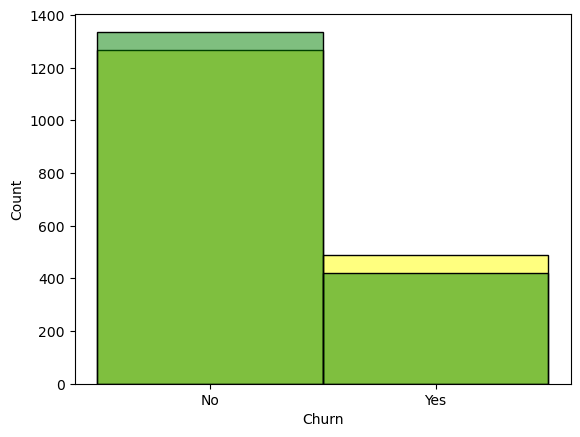

In [67]:
sns.histplot(y_test, color='yellow', alpha=0.5)
sns.histplot(y_test_pred, color='green', alpha=0.5)

In [68]:
# calculate accuracy of class predictions
from sklearn import metrics

metrics.accuracy_score(y_test, y_test_pred)


0.7957906712172924

# Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtcls=DecisionTreeClassifier()

In [39]:
dtcls.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [40]:
y_test_pred = dtcls.predict(X_test_transformed)

In [41]:
metrics.accuracy_score(y_test, y_test_pred)

0.7229806598407281

<AxesSubplot:xlabel='Churn', ylabel='Count'>

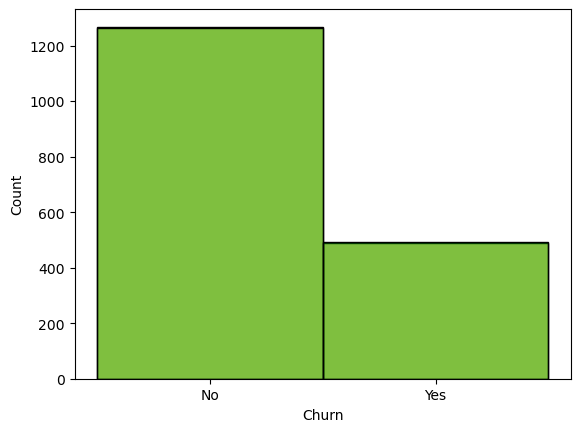

In [42]:
sns.histplot(y_test, color='yellow', alpha=0.5)
sns.histplot(y_test_pred, color='green', alpha=0.5)

# KNN Classifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knncls=KNeighborsClassifier()
knncls.fit(X_train_transformed, y_train)

y_test_pred = knncls.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

0.7571103526734926

<AxesSubplot:xlabel='Churn', ylabel='Count'>

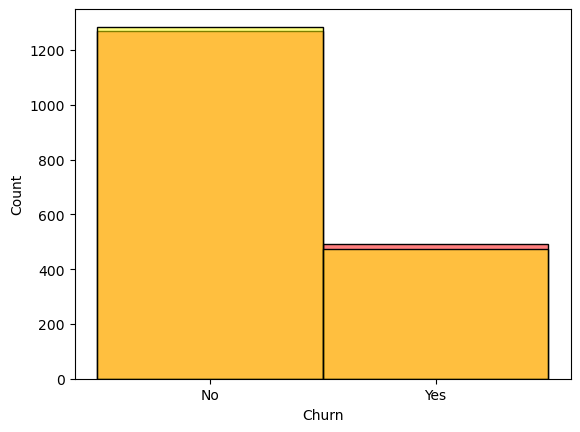

In [64]:
sns.histplot(y_test, color='red', alpha=0.5)
sns.histplot(y_test_pred, color='yellow', alpha=0.5)

# Random forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

0.782707622298066

<AxesSubplot:xlabel='Churn', ylabel='Count'>

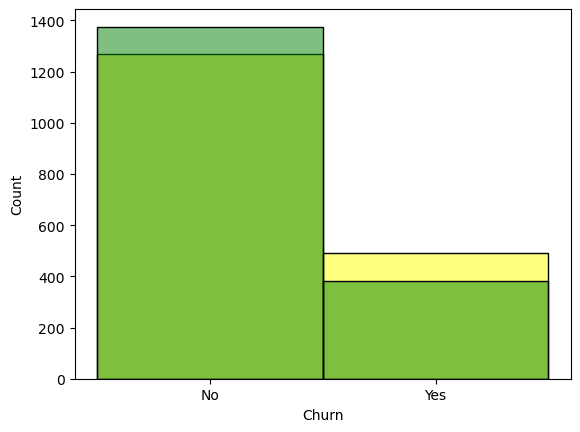

In [48]:
sns.histplot(y_test, color='yellow', alpha=0.5)
sns.histplot(y_test_pred, color='green', alpha=0.5)

# Support Vector Machines

In [52]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_transformed, y_train)
y_test_pred = svm.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

0.78839590443686

<AxesSubplot:xlabel='Churn', ylabel='Count'>

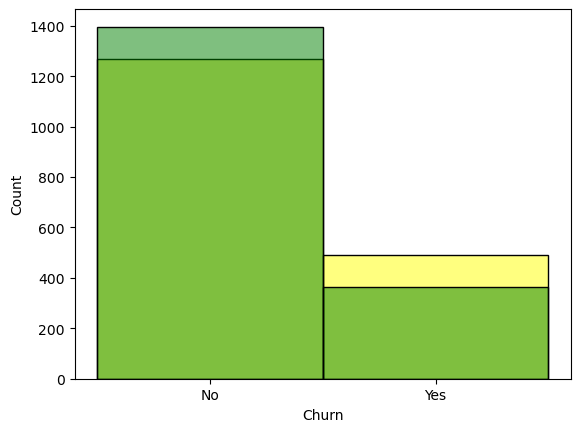

In [53]:
sns.histplot(y_test, color='yellow', alpha=0.5)
sns.histplot(y_test_pred, color='green', alpha=0.5)

# Recommendation:-

## `As we observed from above algorithms Almost all algorithms performing well but  "Decision Tree    Clasifier"&"KNN Classifier " are performing accurate  for Churn Prediction.`